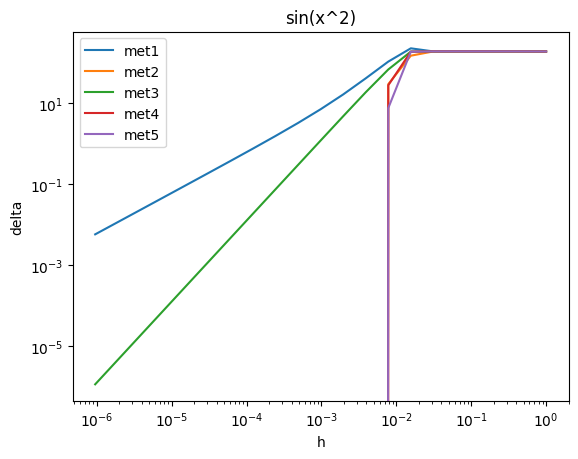

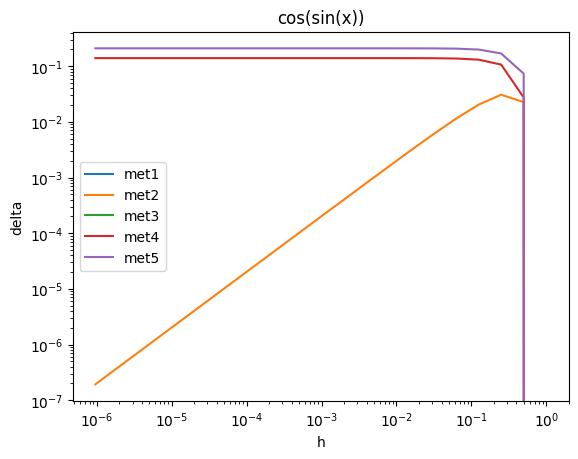

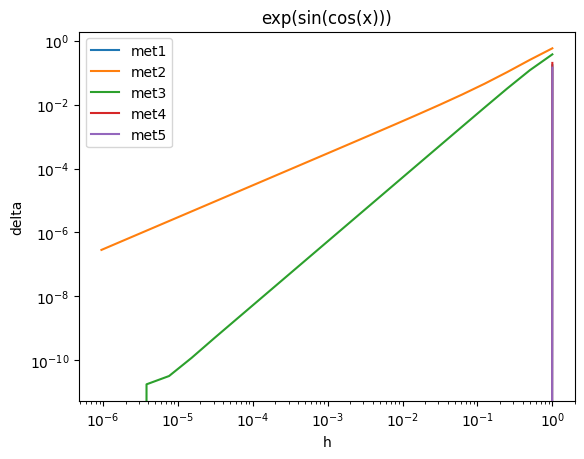

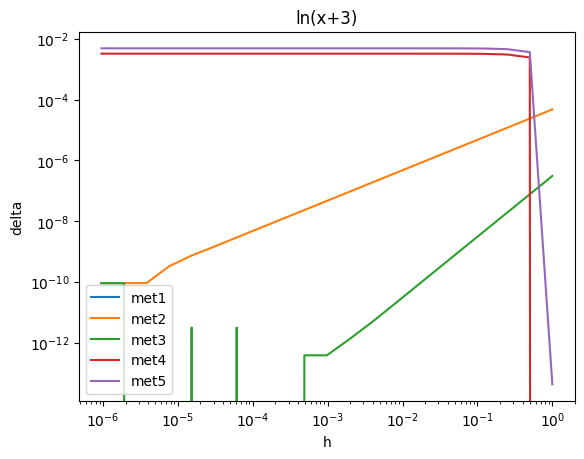

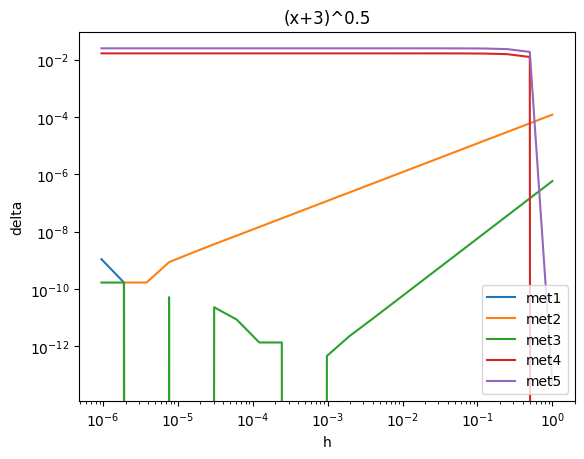

In [50]:
import numpy as np
import matplotlib.pyplot as plt


class foo():
  def __init__(self, x, bar, phi):
    self.n = np.arange(1, 22)
    self.x = x
    self.bar = bar.__get__(self)
    self.phi = phi.__get__(self)
    self.arr = []
    self.result = []

  def calc_step(self):
    for i, num in enumerate(self.n):
      self.arr.append(2 / (2**num))

  def boo1(self):
    print(self.n)

  def met1(self, h):
    return (self.bar(self.x + h) - self.bar(self.x)) / h

  def met2(self, h):
    return (self.bar(self.x) - self.bar(self.x - h)) / h

  def met3(self, h):
    return (self.bar(self.x + h) - self.bar(self.x - h)) / (2 * h)

  def met4(self, h):
    return ((4*(self.bar(self.x + h) - self.bar(self.x - h)) / (6 * h)) -
            ((self.bar(self.x + 2 * h) - self.bar(self.x - 2 * h)) / 12 * h))

  def met5(self, h):
    return ((3*(self.bar(self.x + h) - self.bar(self.x - h)) / (4 * h)) -
            (3 * (self.bar(self.x + 2 * h) - self.bar(self.x - 2 * h)) / 20 * h) +
            ((self.bar(self.x + 3 * h) - self.bar(self.x - 3 * h)) / 60 * h))


  def calc(self, method):
    vec = []
    for i, step in enumerate(self.arr):
      vec.append(method(step))
    return vec

  def calc_all(self):
    self.calc_step()
    self.result.append(self.calc(self.met1) - np.asarray(self.phi(self.x)))
    self.result.append(self.calc(self.met2) - np.asarray(self.phi(self.x)))
    self.result.append(self.calc(self.met3) - np.asarray(self.phi(self.x)))
    self.result.append(self.calc(self.met4) - np.asarray(self.phi(self.x)))
    self.result.append(self.calc(self.met5) - np.asarray(self.phi(self.x)))
   # print(self.result[0])

  def plot_all(self, legend):
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("h")
    plt.ylabel("delta")
    plt.title(legend)
    plt.plot(self.arr, self.result[0], label = "met1")
    plt.plot(self.arr, self.result[1], label = "met2")
    plt.plot(self.arr, self.result[2], label = "met3")
    plt.plot(self.arr, self.result[3], label = "met4")
    plt.plot(self.arr, self.result[4], label = "met5")
    plt.legend()
    plt.show()

def func1(self, x):
  return np.sin(x * x)

def func1_diff(self, x):
  return 2 * x * np.cos(x * x)

def func2(self, x):
  return np.cos(np.sin(x))

def func2_diff(self, x):
  return (-np.cos(x) * np.sin(np.sin(x)))

def func3(self, x):
  return np.exp(np.sin(np.cos(x)))

def func3_diff(self, x):
  return (-1 * np.exp(np.sin(np.cos(x)))) * np.sin(x) * np.cos(np.cos(x))

def func4(self, x):
  return np.log(x + 3)

def func4_diff(self, x):
  return 1 / (x + 3)

def func5(self, x):
  return (x + 3)**0.5

def func5_diff(self, x):
  return 1 / (2 * (x + 3)**0.5)



obj1 = foo (100, func1, func1_diff)
obj2 = foo (100, func2, func2_diff)
obj3 = foo (1000, func3, func3_diff)
obj4 = foo (100, func4, func4_diff)
obj5 = foo (100, func5, func5_diff)



obj1.calc_all()
obj1.plot_all("sin(x^2)")
obj2.calc_all()
obj2.plot_all("cos(sin(x))")
obj3.calc_all()
obj4.calc_all()
obj5.calc_all()
obj3.plot_all("exp(sin(cos(x)))")
obj4.plot_all("ln(x+3)")
obj5.plot_all("(x+3)^0.5")

